<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


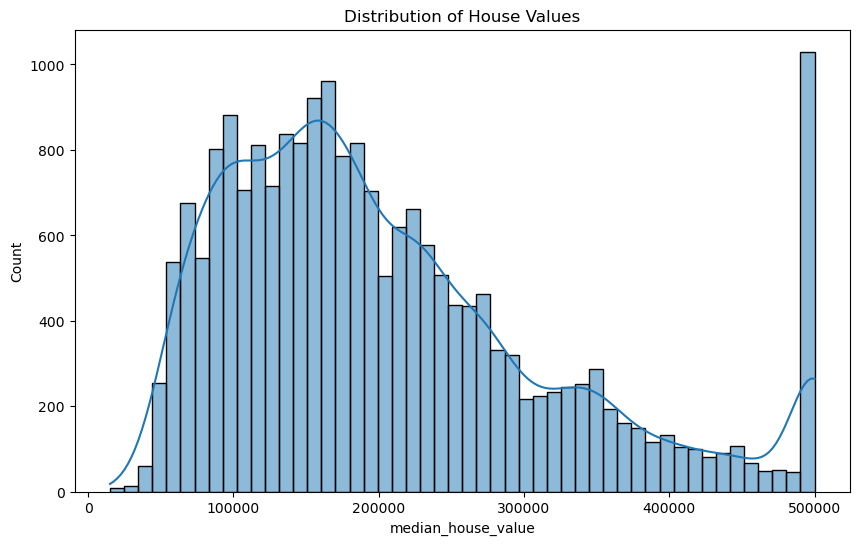

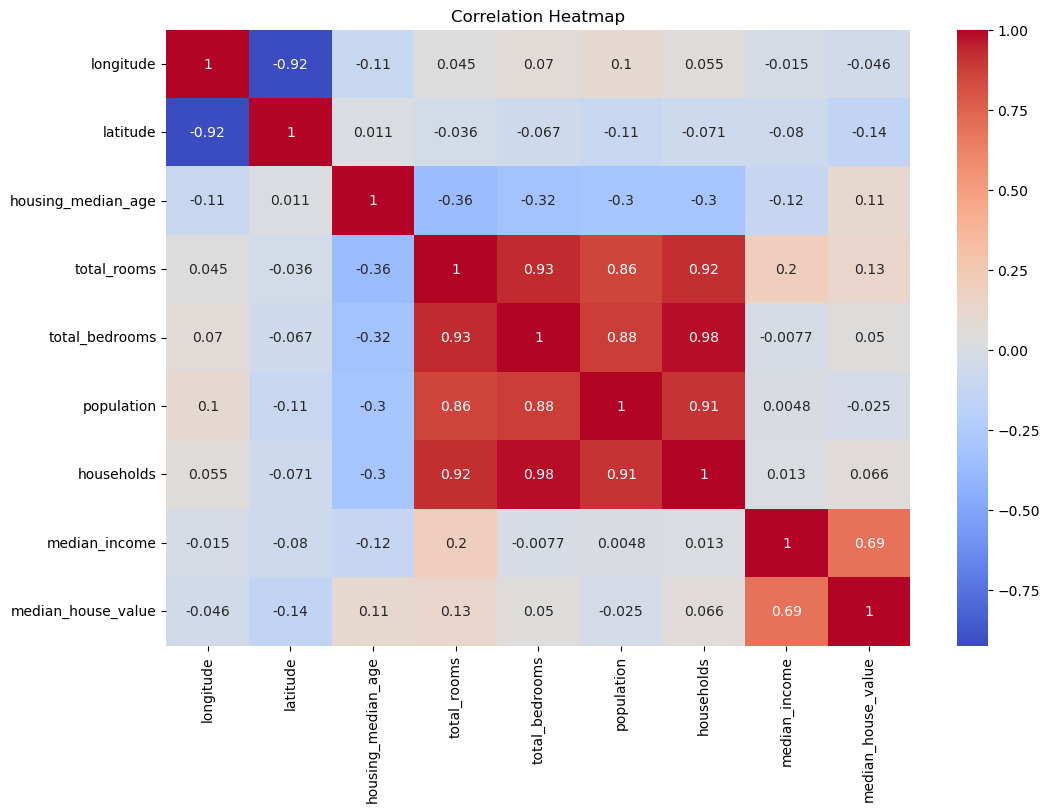

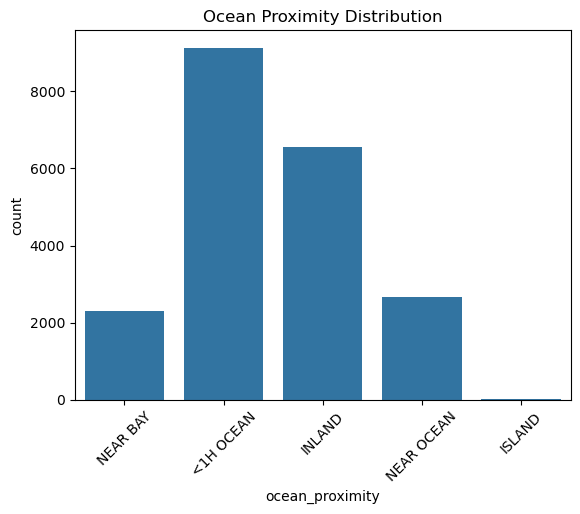

Simple Linear Regression R²: 0.4589
RMSE: 84209.01
Multiple Linear Regression R²: 0.6257
RMSE: 70031.42
Model Comparison:
Simple Linear Regression -> R²: 0.4589, RMSE: 84209.01
Multiple Linear Regression -> R²: 0.6257, RMSE: 70031.42


C:\Users\USER\AppData\Local\Temp\ipykernel_21724\268897550.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_21724\268897550.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [13]:
#PART-A
#Property Price Prediction
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_excel('Data_file.xlsx')
df.head()

df.info()
df.describe()
df.isnull().sum()

# Visualize distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title("Distribution of House Values")
plt.show()

# Correlation heatmap
# Correlation heatmap (numeric columns only)
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Ocean Proximity counts
sns.countplot(data=df, x='ocean_proximity')
plt.title("Ocean Proximity Distribution")
plt.xticks(rotation=45)
plt.show()

# Fill missing values (mean imputation)
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

# Define feature sets
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Identify numerical and categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = ['ocean_proximity']

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_features)
], remainder='passthrough')

# Fill missing values (mean imputation)
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

# Define feature sets
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Identify numerical and categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = ['ocean_proximity']

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_features)
], remainder='passthrough')

X_simple = df[['median_income']]
y_simple = y

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)

y_pred_s = model_simple.predict(X_test_s)

# Evaluation
mse_s = mean_squared_error(y_test_s, y_pred_s)
rmse_s = np.sqrt(mse_s)
r2_s = r2_score(y_test_s, y_pred_s)

print(f"Simple Linear Regression R²: {r2_s:.4f}")
print(f"RMSE: {rmse_s:.2f}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Multiple Linear Regression R²: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

print("Model Comparison:")
print(f"Simple Linear Regression -> R²: {r2_s:.4f}, RMSE: {rmse_s:.2f}")
print(f"Multiple Linear Regression -> R²: {r2:.4f}, RMSE: {rmse:.2f}")


✅ Model Evaluation Metrics:
Accuracy: 0.7285714285714285
Precision: 0.7440729483282674
Recall: 0.6982316029663435
F1 Score: 0.7204237786933491

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.74      6988
           1       0.74      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



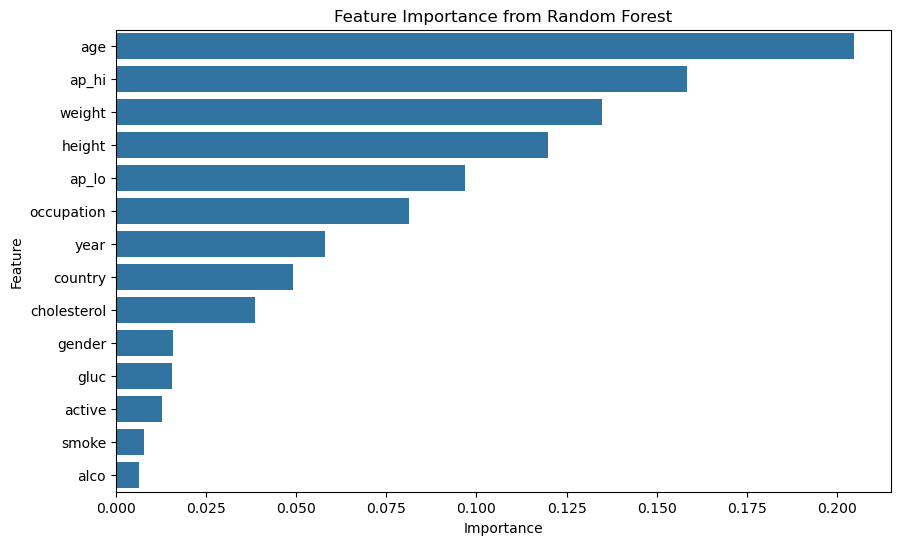

In [3]:
#PART-B
#Customer Churn Prediction
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Load Dataset
file_path = "DOC-20250803-WA0091.xlsx"
df = pd.read_excel(file_path)

# 2. Data Preprocessing
data = df.copy()

# Convert date to datetime and extract year
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['year'] = data['date'].dt.year
data.drop(columns=['date'], inplace=True)

# Encode categorical features
le_country = LabelEncoder()
data['country'] = le_country.fit_transform(data['country'])

le_occ = LabelEncoder()
data['occupation'] = le_occ.fit_transform(data['occupation'])

# Drop irrelevant ID column
data.drop(columns=['id'], inplace=True)

# Define features (X) and target (y)
X = data.drop(columns=['disease'])
y = data['disease']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 4. Model Training - Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Predictions
y_pred = model.predict(X_test)

# 6. Model Evaluation
print("✅ Model Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7. Feature Importance
importances = model.feature_importances_
features = X.columns

feat_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title("Feature Importance from Random Forest")
plt.show()

# 8. Prediction Function for New Data
def predict_new_data(new_data):
    """
    new_data: pandas DataFrame with same features as training set
    Returns: predictions (0/1)
    """
    # Encode categorical columns
    new_data['country'] = le_country.transform(new_data['country'])
    new_data['occupation'] = le_occ.transform(new_data['occupation'])
    
    # Extract year from date
    new_data['date'] = pd.to_datetime(new_data['date'], errors='coerce')
    new_data['year'] = new_data['date'].dt.year
    new_data.drop(columns=['date', 'id'], inplace=True)
    
    # Scale
    new_scaled = scaler.transform(new_data)
    return model.predict(new_scaled)

First 5 Rows of Dataset:
                  date    country  id  active    age  alco  ap_hi  ap_lo  \
0  2021-03-05 00:00:00  Indonesia   0       1  18393     0    110     80   
1  2021-05-08 00:00:00   Malaysia   1       1  20228     0    140     90   
2           13-11-2022  Indonesia   2       0  18857     0    130     70   
3           31-10-2018  Singapore   3       1  17623     0    150    100   
4           25-09-2020  Singapore   4       0  17474     0    100     60   

   cholesterol  gender  gluc  height  occupation  smoke  weight  disease  
0            1       2     1     168   Architect      0    62.0        0  
1            3       1     1     156  Accountant      0    85.0        1  
2            3       1     1     165        Chef      0    64.0        1  
3            1       2     1     169      Lawyer      0    82.0        1  
4            1       1     1     156   Architect      0    56.0        0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700

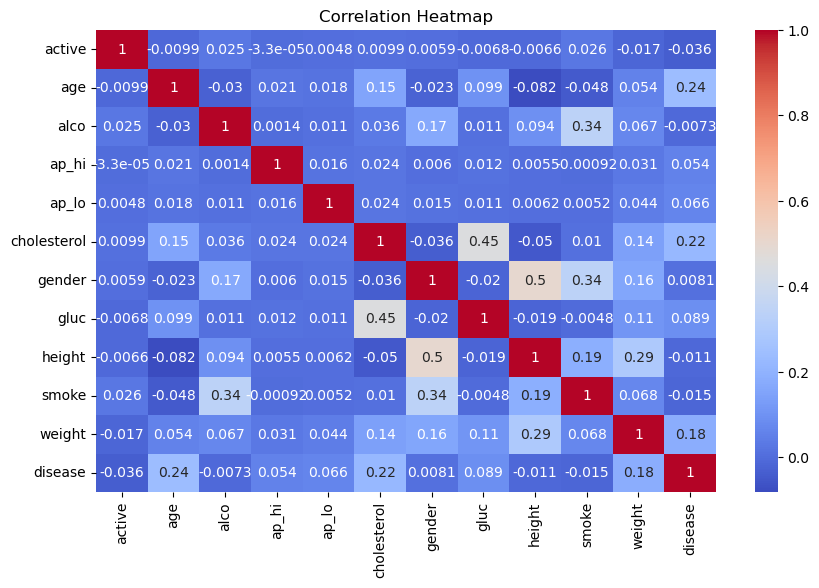


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.75      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000



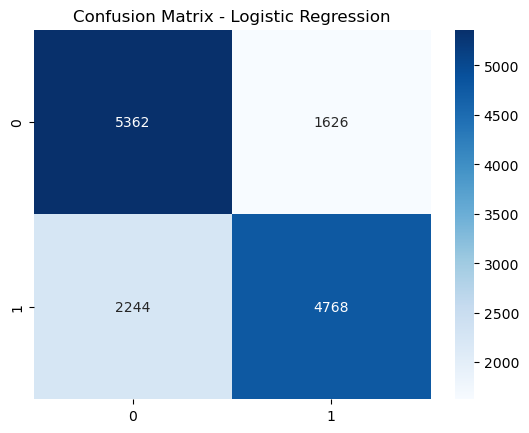


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6988
           1       0.76      0.68      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000



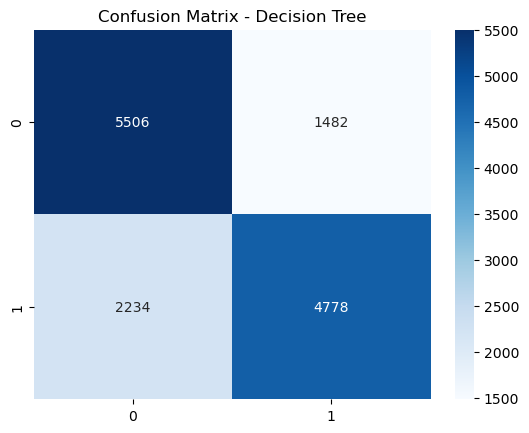

In [ ]:
#PART-C
#Early Disease Detection 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# ===============================
# 2. Load Dataset
# ===============================
file_path = "DOC-20250803-WA0090.xlsx"   # <- change to your file path
df = pd.read_excel(file_path)

# Display first few rows
print("First 5 Rows of Dataset:")
print(df.head())

# ===============================
# 3. Data Exploration & Preprocessing
# ===============================
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# Drop columns not useful for prediction
df = df.drop(columns=['id','date','country','occupation'])

# Encode categorical variables (gender)
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

# Check correlations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ===============================
# 4. Feature & Target Selection
# ===============================
X = df.drop('disease', axis=1)
y = df['disease']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ===============================
# 5. Model Training
# ===============================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "SVM": SVC(kernel='linear')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# ===============================
# 6. Model Performance Summary
# ===============================
print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics}")

# ===============================
# 7. Insights
# ===============================
print("\nFeature Importance (Decision Tree):")
dt = models["Decision Tree"]
importance = dt.feature_importances_
for feature, score in zip(df.drop('disease',axis=1).columns, importance):
    print(f"{feature}: {score:.4f}")